# Big Mac Data Omega
## Your Task
Now it's time to put it all together and complete an activity which demonstrates what you've learned so far. You may use several code windows if this helps.

1) **Read** in the *big_mac_source_data_v2.csv* file and store it in a dataframe.

2) **Remove** the *iso_a3*, *GDP_dollar* and *GDP_local* columns.

3) **Remove** all rows **except** for *Australia*, *Britan*, *France*, *New Zealand* and *United States*. Hint: [Drop All Rows Except](https://www.statology.org/pandas-drop-all-rows-except/).

4) **Create** a new column which calculates the **US dollar price** by multipling *local_price* by *dollar_ex* [How to mulitply two columns in Pandas](https://www.statology.org/pandas-multiply-two-columns/). If you get a warning due to setting a value on copy of a slice, use: 

    `name_of_your_dataframe.loc[:, 'yournewcolumnname'] = ...` 

5) **Calculate** the **mean** for each country in USD. You may need to first isolate each country [Select rows from Dataframe based on Column Values](https://sentry.io/answers/select-rows-from-a-python-pandas-dataframe-based-on-column-values/)

6) Use **matplotlib** to plot a **comparison** of each country's average - look at [matplotlib Bars](https://www.w3schools.com/python/matplotlib_bars.asp)

7) Do step 4 and 5 again for **median**.

8) **Extension:** See if you can simplify step 5-7 into the minimum amount of code possible (use *for loops* and *functions* where possible)

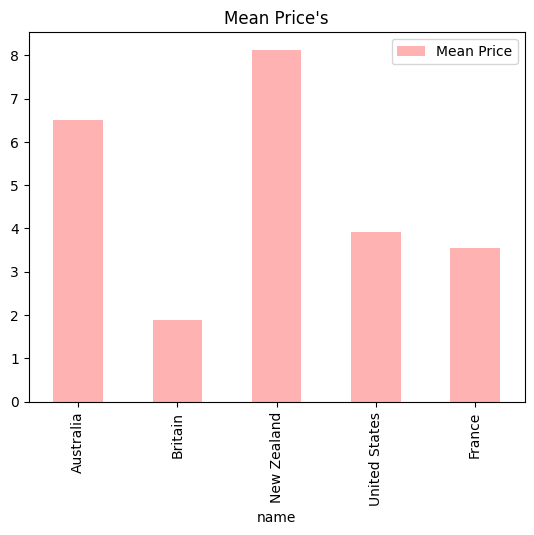

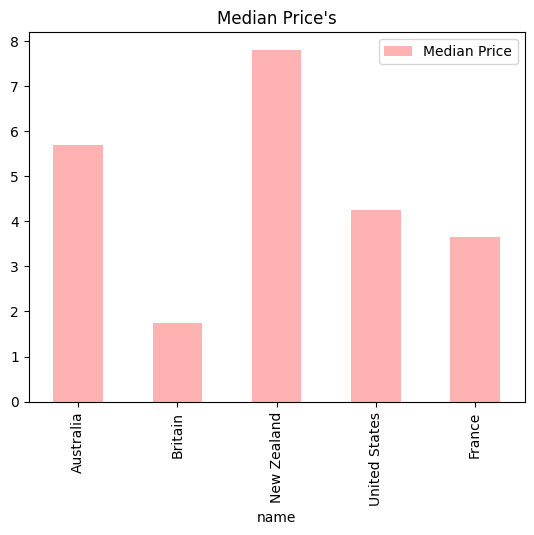

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
big_mac = pd.read_csv('data/big_mac_source_data_v2.csv')
big_mac.drop(columns=['iso_a3', 'GDP_dollar', 'GDP_local'])
big_mac['USD Price'] = big_mac.local_price * big_mac.dollar_ex
fulvalues = []
medianvals = []

for name in big_mac["name"]:
    value = 0
    x = 0
    for i in big_mac.loc[big_mac["name"] == name]["USD Price"]:
        value += i
        x += 1
    value = value / x
    big_mac.loc[big_mac["name"] == name]
    fulvalues.append(value)
    medianvals.append(np.median(big_mac.loc[big_mac["name"] == name]["USD Price"]))
big_mac['Mean Price'] = fulvalues
big_mac['Median Price'] = medianvals
#.query("name == 'Australia' | name == 'Britain' | name == 'France' | name == 'New Zealand' | name == 'United States'")
#big_mac.query("name == 'Australia' | name == 'Britain' | name == 'France' | name == 'New Zealand' | name == 'United States'")
big_mac.iloc[[1,10,19,26,2039],:].plot(kind='bar',
                                        x='name',
                                        y='Mean Price',
                                        color='red',
                                        alpha=0.3,
                                        title='Mean Price\'s')
plt.show()

big_mac.iloc[[1,10,19,26,2039],:].plot(kind='bar',
                                        x='name',
                                        y='Median Price',
                                        color='red',
                                        alpha=0.3,
                                        title='Median Price\'s')
plt.show()
